In [3]:
import pandas as pd
df=pd.read_csv("Reddit_Data.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [5]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [10]:
df = df[df['clean_comment'].str.strip() != '']

In [11]:
df['clean_comment']=df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [12]:
df[df['clean_comment'].str.endswith(' ', na=False) | df['clean_comment'].str.startswith(' ', na=False)]


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [13]:
df['clean_comment']=df['clean_comment'].str.strip()
df[df['clean_comment'].str.endswith(' ', na=False) | df['clean_comment'].str.startswith(' ', na=False)].sum()

clean_comment    0
category         0
dtype: object

In [14]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_url = df[df['clean_comment'].str.contains(url_pattern, regex=True, na=False)]
comments_with_url.head()


,clean_comment,category


In [15]:
comments_with_newline = df[df['clean_comment'].str.contains('\n', regex=False, na=False)]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [16]:
df['clean_comment']=df['clean_comment'].str.replace('\n', ' ',regex=True)
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n', regex=False, na=False)]
comments_with_newline_remaining.shape


(0, 2)

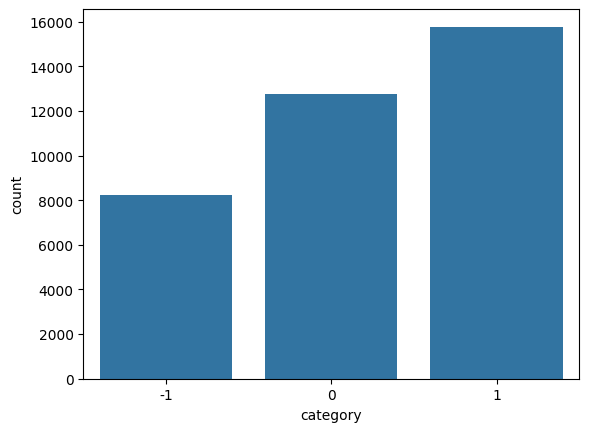

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='category')
plt.show()

In [18]:
df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [19]:
df['word_count'] = df['clean_comment'].str.split().str.len()

In [20]:
df.sample(5)

,clean_comment,category,word_count
32291,they might just block telegram website soon,0,7
7244,man you have really hard parents especially mo...,-1,75
13671,together strong,1,2
16345,odd how advanced india some respects science b...,-1,18
19821,yeah and then fight among themselves,0,6


In [21]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

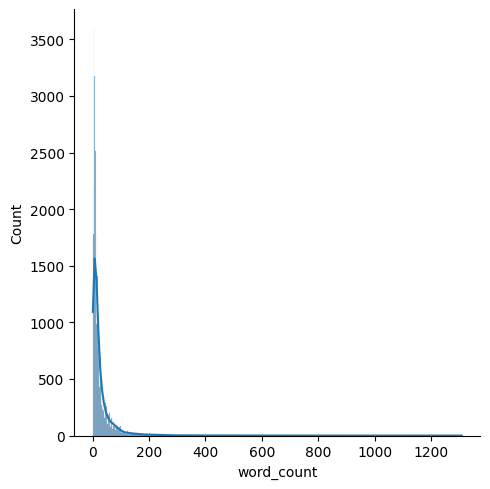

In [22]:
sns.displot(df['word_count'],kde=True)

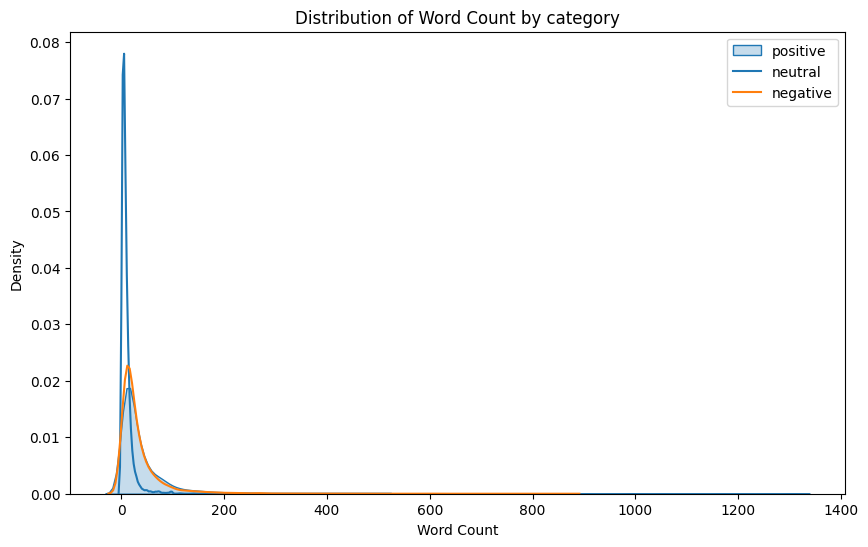

In [23]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category']==1]['word_count'],label='positive',fill=True)
sns.kdeplot(df[df['category']==0]['word_count'],label='neutral')
sns.kdeplot(df[df['category']==-1]['word_count'],label='negative')
plt.title('Distribution of Word Count by category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()
plt.show()

<Axes: ylabel='word_count'>

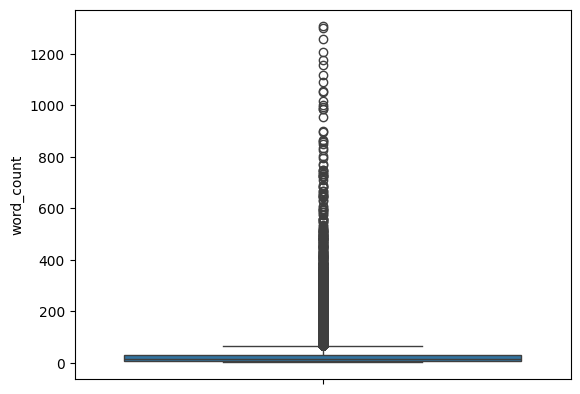

In [24]:
sns.boxplot(df['word_count'])

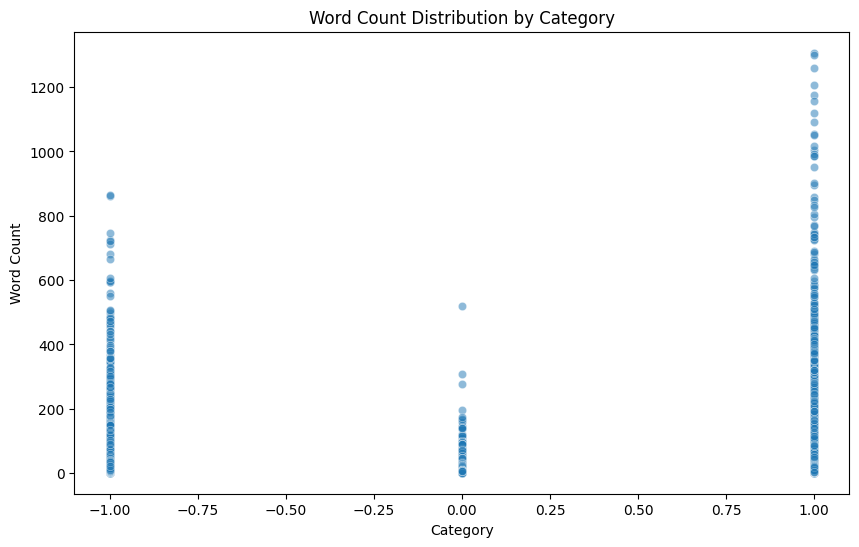

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='category',y='word_count',alpha=0.5)
plt.title('Word Count Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

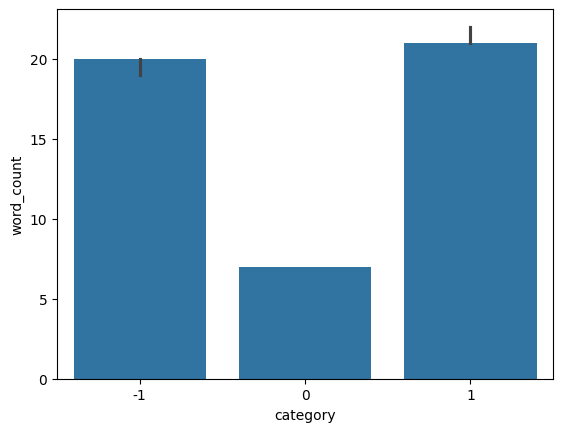

In [33]:
sns.barplot(df,x="category",y="word_count",estimator='median')

In [37]:
from nltk.corpus import stopwords
import nltk
stop_words=set(stopwords.words('english'))
df['num_stop_words'] = df['clean_comment'].apply(
    lambda x: len([word for word in x.split() if word in stop_words])
)


In [38]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
32497,there will employment there will plenty jobs a...,1,16,10
18212,politicians are usually very subtle about how ...,-1,327,120
28433,nuke america first,1,3,0
28064,all websites work take out the html and the no...,1,26,9
36022,keep voting out the present government whichev...,0,14,5


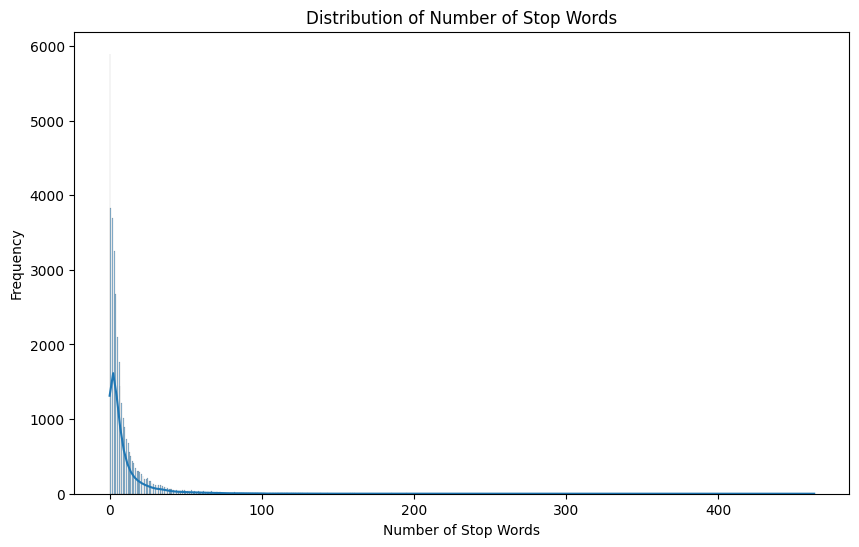

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'],kde=True)
plt.title('Distribution of Number of Stop Words')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

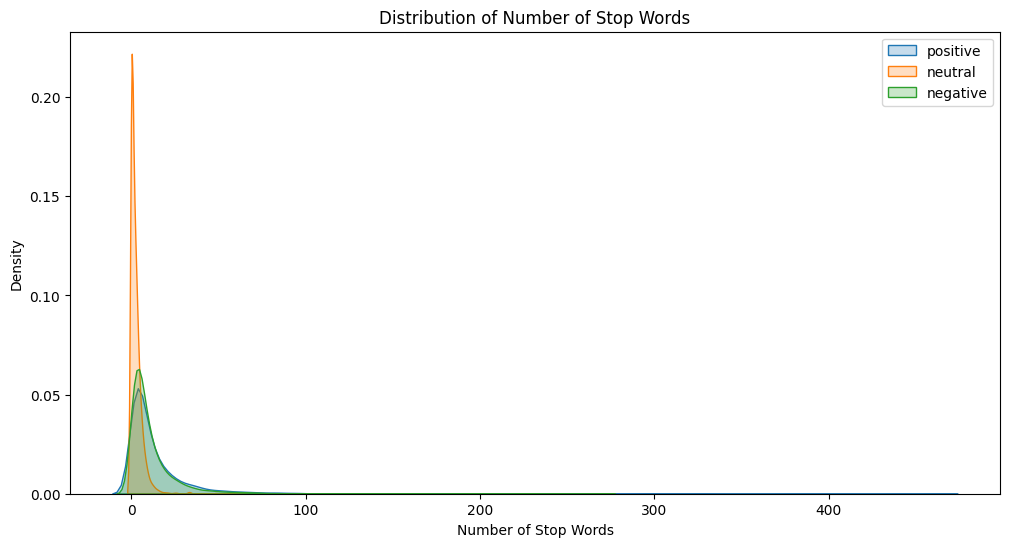

In [40]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df['category']==1]['num_stop_words'],label='positive',fill=True)
sns.kdeplot(df[df['category']==0]['num_stop_words'],label='neutral',fill=True)
sns.kdeplot(df[df['category']==-1]['num_stop_words'],label='negative',fill=True)
plt.title('Distribution of Number of Stop Words')
plt.xlabel('Number of Stop Words')
plt.ylabel('Density')

plt.legend()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16196\2004301353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='stop_word',x='count',data=top_25_df,palette='viridis')


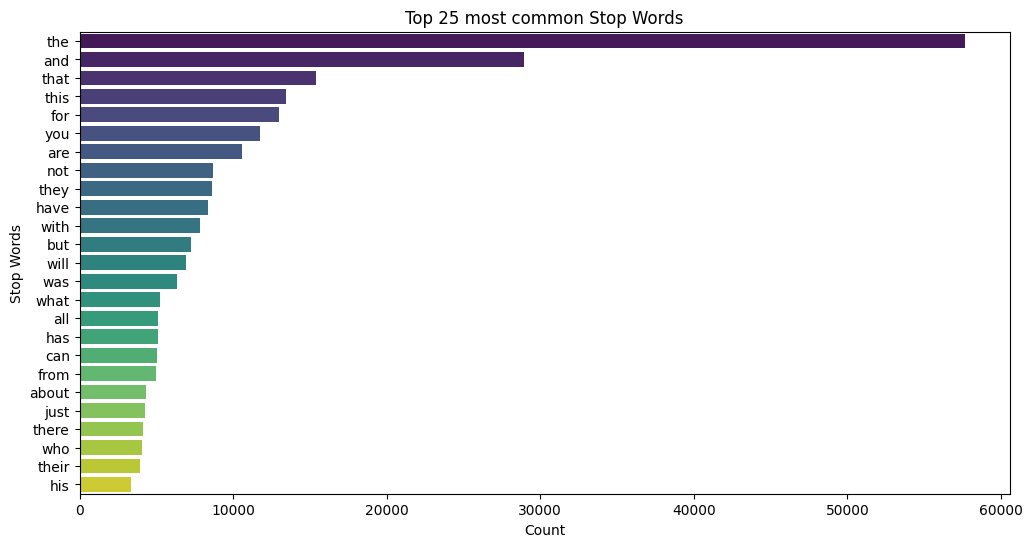

In [43]:
from collections import Counter
all_stop_words=[word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_words=Counter(all_stop_words).most_common(25)
top_25_df=pd.DataFrame(most_common_words,columns=['stop_word','count'])
plt.figure(figsize=(12,6))
sns.barplot(y='stop_word',x='count',data=top_25_df,palette='viridis')
plt.title('Top 25 most common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Words')
plt.show()

In [45]:
df['num_chars']=df['clean_comment'].apply(len)
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [46]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [47]:
from collections import Counter
all_text=' '.join(df['clean_comment'])
char_frequency=Counter(all_text)
char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values('frequency',ascending=False)

In [48]:
char_frequency_df.head()

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388


In [51]:
df['num_punctuation_chars']=df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,?()[]{}-' ]))
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
6233,does fall under intolerance,0,4,2,27,0
14606,sad that has started happen even karnataka sou...,1,40,17,260,0
4385,first good elements call this season,1,6,1,36,0
28286,both sides are getting bogged down jingoism an...,-1,43,14,273,0
24968,who makes the best stories gets the best space...,1,10,4,50,0


In [52]:
df['num_punctuation_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

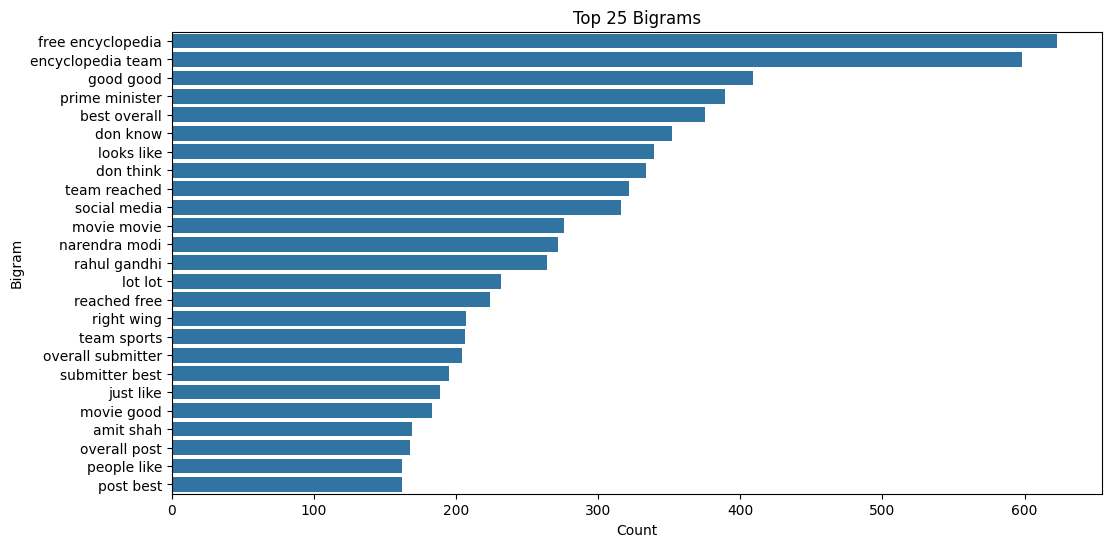

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngrams(corpus,n=None):
    vec=CountVectorizer(ngram_range=(2,2),stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_frequency=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_frequency=sorted(word_frequency, key=lambda x: x[1], reverse=True)
    return word_frequency[:n]
top_25_bigrams=get_top_ngrams(df['clean_comment'],25)
top_25_bigrams_df=pd.DataFrame(top_25_bigrams,columns=['Bigram','count'])
plt.figure(figsize=(12,6))
sns.barplot(x='count',y='Bigram',data=top_25_bigrams_df)
plt.title('Top 25 Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

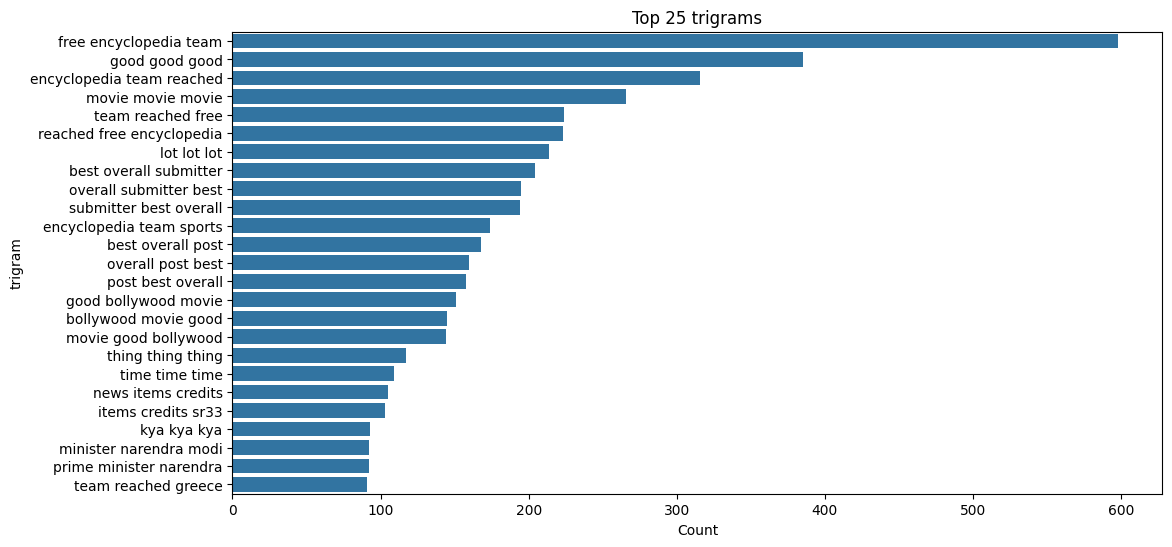

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_trigrams(corpus,n=None):
    vec=CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words=vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_frequency=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_frequency=sorted(word_frequency, key=lambda x: x[1], reverse=True)
    return word_frequency[:n]
top_25_trigrams=get_top_trigrams(df['clean_comment'],25)
top_25_trigrams_df=pd.DataFrame(top_25_trigrams,columns=['trigram','count'])
plt.figure(figsize=(12,6))
sns.barplot(x='count',y='trigram',data=top_25_trigrams_df)
plt.title('Top 25 trigrams')
plt.xlabel('Count')
plt.ylabel('trigram')
plt.show()

In [58]:
import re
df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.]', '', str(x)))

In [59]:
all_text=' '.join(df['clean_comment'])
char_frequency=Counter(all_text)
char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency',ascending=False)
char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [61]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))-{'not','but','however','no','yet'}
df['clean_comment']=df['clean_comment'].apply(lambda x:' '.join([word for word in x.split() if word not in stop_words]))

In [62]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['clean_comment']=df["clean_comment"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...


In [63]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


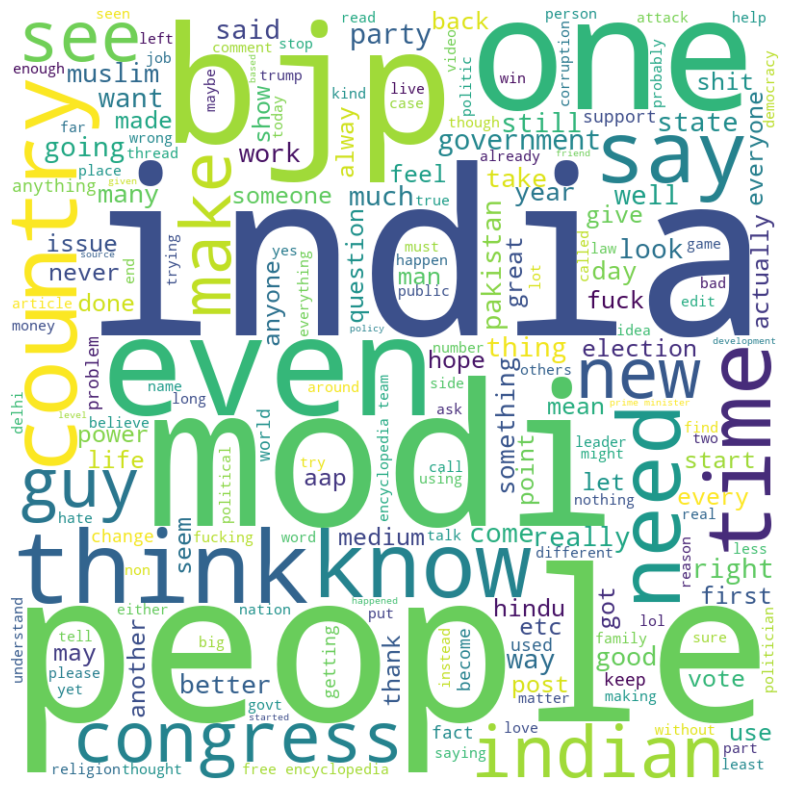

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    text = text.dropna().astype(str)  # safety step
    
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color='white'
    ).generate(' '.join(text))
    
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# call function OUTSIDE definition
plot_word_cloud(df['clean_comment'])


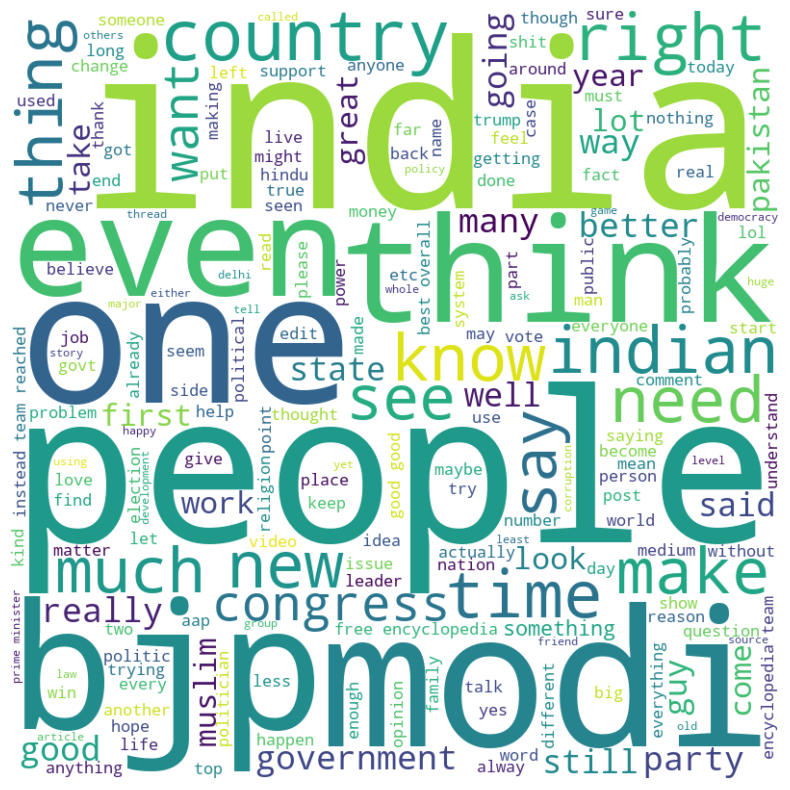

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    text = text.dropna().astype(str)  # safety step
    
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color='white'
    ).generate(' '.join(text))
    
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# call function OUTSIDE definition
plot_word_cloud(df[df['category']==1]['clean_comment'])


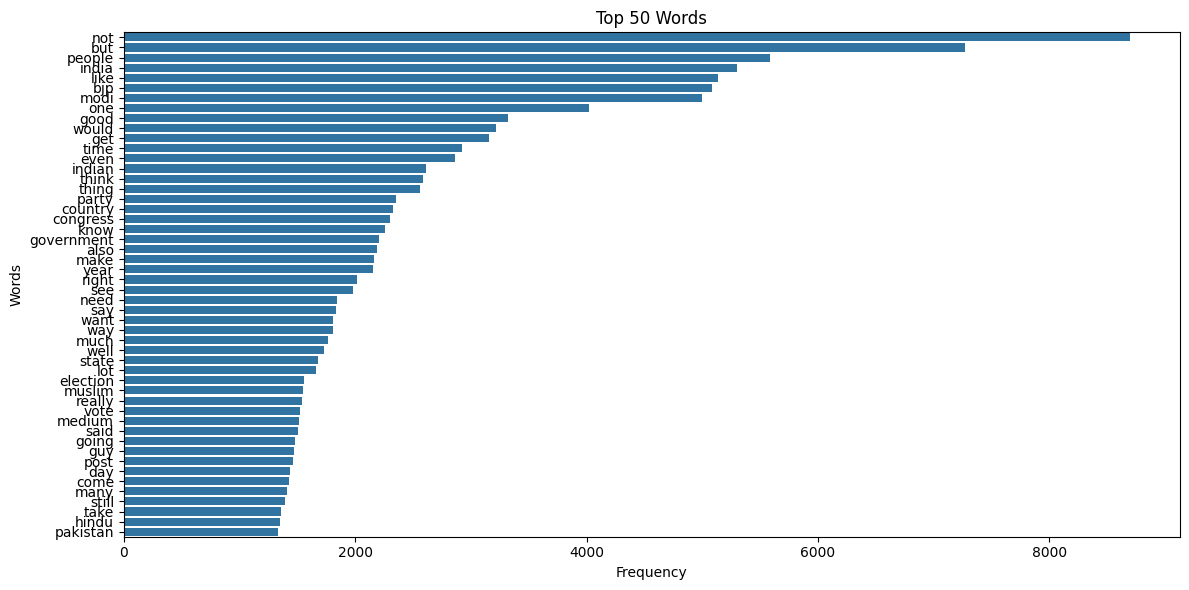

In [71]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_n_words(df, n=20):
    text = df['clean_comment'].dropna().astype(str)
    
    words = ' '.join(text).split()
    counter = Counter(words)
    most_common_words = counter.most_common(n)
    
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Words')
    plt.tight_layout()
    plt.show()

# function call (OUTSIDE)
plot_top_n_words(df, n=50)
